In [1]:
import numpy as np
import matplotlib.pyplot as plt

from trace import gen_irm_trace
from policy import LRU, LFU, OGD, gen_best_static
from cache import init_cache

In [2]:
def simulate_cache(policy, trace, cache_init):
    cache = cache_init.copy()
    hits = []
    for request in trace:
        cache, hit = policy(cache, request)
        hits.append(hit)
    hitrate = np.cumsum(hits) / np.arange(1, len(trace)+1)
    return hitrate

def plot_comp(LRU, LFU, BH, OGD):
    t = np.arange(1, len(LRU)+1)
    plt.plot(t, LRU)
    plt.plot(t, LFU)
    plt.plot(t, BH)
    plt.plot(t, OGD)
    
    plt.xlabel("time")
    plt.ylabel("avg hits")
    plt.ylim([0, 0.8])

    plt.legend(("LRU", "LFU", "Best static", "OGD"))

    plt.show()

In [3]:
cache_size = 30
catalog_size = 100
sample_size = 1000000
power_law_exp = 0.8


In [4]:
print("Generating trace")
trace = gen_irm_trace(sample_size, catalog_size, power_law_exp)
cache_init = init_cache(cache_size, catalog_size)

Generating trace


In [5]:
print("LRU")
hitrate_LRU = simulate_cache(LRU, trace, cache_init)

LRU


In [6]:
print("LFU")
LFU.request_freq = np.ones(catalog_size)
hitrate_LFU = simulate_cache(LFU, trace, cache_init)

LFU


In [7]:
print("Best static")
best_static_cache = gen_best_static(trace, cache_size, catalog_size)
bs_func = lambda cache, request: (cache, 1) if request in cache else (cache, 0)
hitrate_BH = simulate_cache(bs_func, trace, best_static_cache)

Best static


In [8]:
print("OGD")
hitrate_OGD = OGD(trace, cache_size, catalog_size, sample_size)

OGD


/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


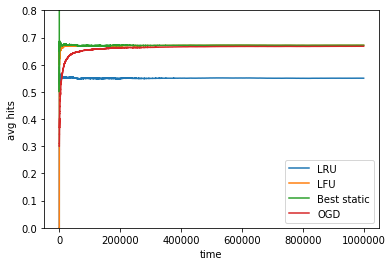

In [9]:
%matplotlib inline
plot_comp(hitrate_LRU, hitrate_LFU, hitrate_BH, hitrate_OGD)